In [ ]:
import numpy as np
from typing import List, Callable

In [ ]:
def matrix_multiplication(m_1:np.ndarray, m_2:np.ndarray) -> np.ndarray:
    """Metodo que multiplica dos matrices recibidas por argumento
        y devuelve la matriz resultante"""
    
    # shape = (rows, columns)    
    m_1_shape, m_2_shape = m_1.shape, m_2.shape
    if m_1_shape[1] != m_2_shape[0]:
        return None

    m_final = np.zeros(shape=(m_1_shape[0], m_2_shape[1]))
    # Filas de m_1
    for i in range(m_1_shape[0]):
        # Columnas de m_2
        for j in range(m_2_shape[1]):
            # Columnas de m_1 y filas de m_2 a la vez
            for k in range(m_1_shape[1]):
                m_final[i][j] += m_1[i][k] * m_2[k][j]

    return m_final

In [ ]:
l_timings = []
l_numpy_timings = []
for i in range(11):
    dim = 10 + i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m) 
    l_timings.append([dim, timings.best])
    timings = %timeit -o -n 10 -r 5 -q m.dot(m) 
    l_numpy_timings.append([dim, timings.best])

l_timings = np.array(l_timings)
l_numpy_timings = np.array(l_numpy_timings)
#print(l_timings)

In [ ]:
def rec_bb(t:List, f:int, l:int, key:int) -> int:
    """Metodo que realiza el algoritmo de busqueda binaria recursivamente.
        Devuelve la posicion del elemento buscado en caso de encontrarlo."""
        
    if f > l:
        return
    if f == l:
        if key == t[f]:
            return f
        return

    mid = (f + l) // 2
    if t[mid] == key:
        return mid
    if t[mid] < key:
        return rec_bb(t, mid + 1, l, key)
    return rec_bb(t, f, mid - 1, key)
    
def bb(t:List, f:int, l:int, key:int) -> int:
    """Metodo que realiza el algoritmo de busqueda binaria iterativamente.
        Devuelve la posicion del elemento buscado en caso de encontralo."""
    
    while f <= l:
        mid = (f + l) // 2
        if t[mid] == key:
            return mid
        if t[mid] < key:
            f = mid + 1
        else:
            l = mid - 1
    return None

In [ ]:
l_rec_times = []
l_bb_times = []
for i, size in enumerate(range(5,15)):
    t = list(range(2**i * size))
    key = t[-1]+1
    bb_timings = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
    l_bb_times.append([len(t), bb_timings.best])
    rec_timings = %timeit -n 100 -r 10 -o -q rec_bb(t, 0, len(t) - 1, key)
    l_rec_times.append([len(t), rec_timings.best])
    
bb_times = np.array(l_bb_times)
rec_times = np.array(l_rec_times)
#print(times)


**Cuestiones**

*1. ¿A qué función f se deberían ajustar los tiempos de multiplicación de la función de multiplicación de matrices?*


Se deberían ajustar a una función cúbica, ya que se necesitan tres bucles para realizar el recorrido de las matrices factor:
$f = O(N^3)$

In [ ]:
from sklearn.linear_model import LinearRegression

def fit_func_2_times(timings: np.ndarray, func_2_fit: Callable):
    """Ajusta linealmente los valores de la funcion func_2_fit a
    los tiempos en timings.
    Esto es, calculamos valores a, b para que la funcion a*f(dim) + b
    se ajuste a los tiempos medidos.
    """
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)
    values = func_2_fit(timings[ :, 0]).reshape(-1, 1)
    
    #normalizar timings
    times = timings[ : , 1] / timings[0, 1]
    
    #ajustar a los valores en times un modelo lineal sobre los valores en values
    lr_m = LinearRegression()
    lr_m.fit(values, times)

    return lr_m.predict(values)

def func_2_fit(n):
    return n**3

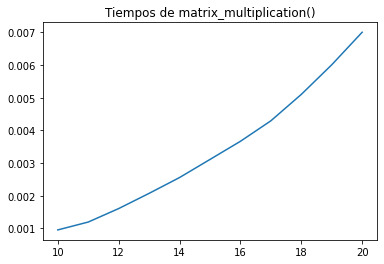

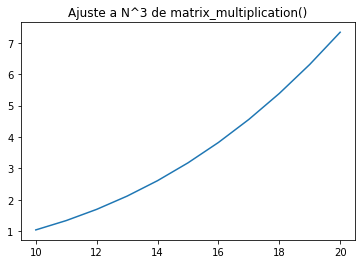

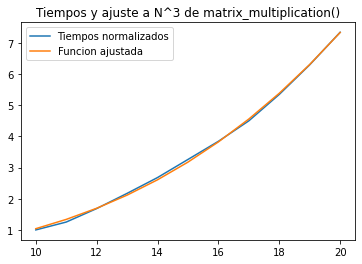

In [ ]:
import matplotlib.pyplot as plt

fit_func = fit_func_2_times(l_timings, func_2_fit) 

plt.plot(l_timings[:,0], l_timings[:,1])
plt.title("Tiempos de matrix_multiplication()")
plt.show()
plt.plot(l_timings[:,0], fit_func) 
plt.title("Ajuste a N^3 de matrix_multiplication()")
plt.show() 

plt.plot(l_timings[:,0], l_timings[:,1] / l_timings[0,1], label="Tiempos normalizados")
plt.plot(l_timings[:,0], fit_func, label="Funcion ajustada") 
plt.title("Tiempos y ajuste a N^3 de matrix_multiplication()")
plt.legend()
plt.show()

##################################
# Comentar en memoria que se han normalizado los tiempos para juntar graficas
##################################

*1. Comenta los resultados*

Como se puede observar, el ajuste es muy bueno ya que, al coger los tiempos mejores de cada iteracion, se consigue una gráfica suavizada.

Con esto se demuestra que el método matrix_multiplication() tiene un tiempo de ejecución del orden de $O(N³)$

*2. Calcular los tiempos de ejecución que se obtendrían usando la multiplicación de matrices "a.dot(b)" de Numpy y comparalos con los anteriores*

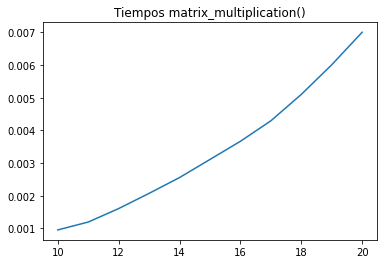

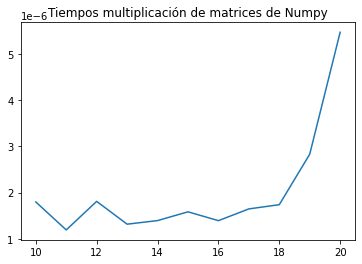

In [ ]:
plt.plot(l_timings[:,0], l_timings[:,1])
plt.title("Tiempos matrix_multiplication()")
plt.show()
plt.plot(l_numpy_timings[:,0], l_numpy_timings[:,1]) 
plt.title("Tiempos multiplicación de matrices de Numpy")
plt.show() 

Observando el eje vertical, el cual refleja el mejor tiempo de ejecución de cada iteración en segundos, se puede comprobar que el método de multiplicación de matrices propuesto por Numpy es muchísimo más eficaz que la función "matrix_multiplication", donde las primeras medidas son del orden de 10^(-6) y las segundas de 10^(-3).


*3. Comparar los tiempos de ejecución de las versiones recursiva e iterativa de la búsqueda binaria en su caso más costoso y dibujarlos para unos tamaños de tabla adecuados. ¿Se puede encontrar alguna relación entre ellos?*

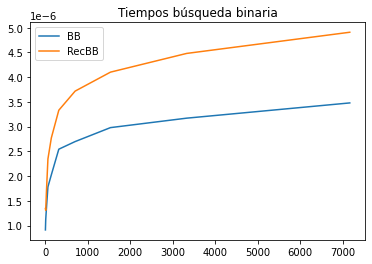

In [ ]:
plt.plot(bb_times[:,0], bb_times[:,1], label="BB")
plt.plot(rec_times[:,0], rec_times[:,1], label="RecBB")
plt.legend()
plt.title("Tiempos búsqueda binaria")
plt.show() 

Se puede observar que el método recursivo es un poco más lento que el método iterativo, esto es debido a que aunque la complejidad temporal teórica de ambas es la misma (se puede ver en la gráfica como ambas siguen la función logarítmica), la versión recursiva debe tardar más tiempo en ejecutarse debido a la sobrecarga de las llamadas a funciones, pues debido a cada llamada recursiva, se asigna algo de memoria en la pila para almacenar parámetros y variables locales.

In [ ]:
def min_heapify(h:np.ndarray, i:int) -> np.ndarray:
    """Metodo que baja el elemento i-esimo del heap hasta una posicion correcta.
        Devuelve el heap modificado."""
    
    h_len = len(h) - 1
    if i < 0 or i > h_len:
        return None
        
    while 2*i+1 <= h_len: 
        n_i = i
        # Compara padre con hijo izquierdo
        if h[i] > h[2*i+1]:
           n_i = 2*i+1
        # Compara padre o hijo izquierdo con hijo derecho
        if 2*i+2 <= h_len and h[i] > h[2*i+2] and h[2*i+2] < h[n_i]:
           n_i = 2*i+2
        # Si algun hijo es menor que el padre, se cambian
        if n_i > i:
            h[i], h[n_i] = h[n_i], h[i]
            i = n_i
        else:
            break
        
    return h

def insert_min_heap(h:np.ndarray, k:int) -> np.ndarray:
    """Metodo que inserta un elemento k en el heap en una posicion correcta.
        Devuelve el heap modificado"""

    if h is None:
        return np.array([k])
        
    i = len(h)
    h = np.append(h, k)

    # Mientras el padre sea mayor que el hijo, se cambian
    while i > 0 and h[(i-1)//2] > h[i]:
        h[i], h[(i-1)//2] = h[(i-1)//2], h[i]
        i = (i-1)//2  
    return h

def create_min_heap(h:np.ndarray): 
    """Metodo que reordena todo el heap de forma correcta.
        Devuelve el heap modificado"""

    if h is None:
        return None

    # Se recorren los nodos internos del heap desde
    # el padre de la ultima hoja hasta la raiz
    for node in range((len(h) - 1) // 2, -1, -1):
        min_heapify(h, node)
        
    return h

def pq_ini():
    """Metodo que devuelve una cola de prioridad vacia"""
    
    return np.empty(shape=0)

def pq_insert(h:np.ndarray, k:int) -> np.ndarray:
    """Metodo que inserta un elemento en la cola de prioridad.
        Devuelve la cola modificada"""
    
    return insert_min_heap(h, k)

def pq_remove(h:np.ndarray) -> np.ndarray:
    """Metodo que elimina el elemento prioritario de la cola.
        Devuelve el elemento y la cola reordenada"""
    
    if h is None:
        return None, h

    if len(h) <= 0:
        return None, h
    
    # Búsqueda del elemento menor (por si no está heapificado)
    h_min, pos = h[0], 0
    for i, value in enumerate(h):
        if h_min > value:
            h_min, pos = value, i

    h[pos], h[-1] = h[-1], h[pos]
    return h_min, create_min_heap(h[:-1])

def select_min_heap_2(h:np.ndarray, k:int) -> int:
    """Metodo que devuelve el k-esimo elemento mayor del heap si existe empleando max heap"""

    if h is None:
        return None

    if k > len(h) - 1:
      return None

    c = np.negative(h) # convertimos todos los valores del array a negativo
    c = create_min_heap(c)

    for _ in range(k):
      val, c = pq_remove(c)

    if val is None:
        return None
    return -val

def select_min_heap(h:np.ndarray, k:int) -> int:
    """Metodo que devuelve el k-esimo elemento menor del heap si existe empleando max heap"""

    if h is None: #comprobamos que no sea None
        return None

    if k > len(h) - 1: #comprobamos que nos pida una pos válida
      return None

    heap = create_min_heap(np.negative(h[:k+1])) #creas un max heap con esos valores (en la raiz estará el k esimo elemento)
    for i in range(k+1, len(h)):
      val = -h[i]
      if(val>heap[0]):
        heap = heap[1:] #simplemente quitamos la raiz es innecesario el remove dado que inmediatamente después insertamos
        heap = pq_insert(heap, val) #al insertar volvemos a heapificar y se forma el max heap de nuevo

    val = heap[0]
    if val is None:
        return None
    return -val



**Cuestiones**

**1. Analizar visualmente los tiempos de ejecución de nuestra función de creación de min heaps. ¿A qué función f se deberían ajustar dichos tiempos?**

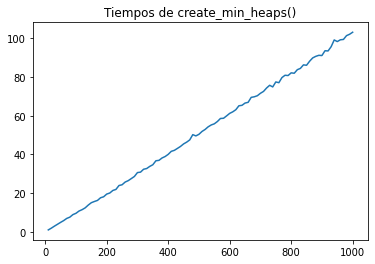

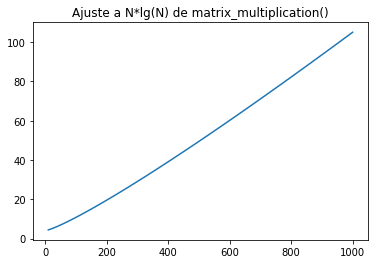

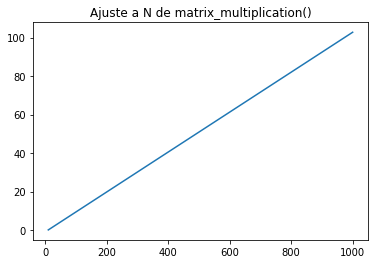

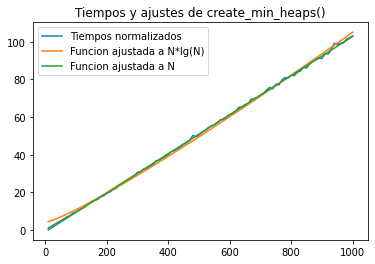

In [ ]:
from random import sample
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

heaps_timings = []
for h_len in range(10, 1001, 10):
    h = np.array(sample(range(0, h_len), h_len))
    timings = %timeit -n 100 -r 10 -o -q create_min_heap(h)
    heaps_timings.append([h_len, timings.best])

heaps_timings = np.array(heaps_timings)
#print(heaps_timings)

def fit_func_2_times_2(timings: np.ndarray, func_2_fit: Callable):
    """Ajusta linealmente los valores de la funcion func_2_fit a
    los tiempos en timings.
    Esto es, calculamos valores a, b para que la funcion a*f(dim) + b
    se ajuste a los tiempos medidos.
    """
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)
    values1 = func_2_fit_2(timings[ : , 0]).reshape(-1, 1)
    values2 = timings[ : , 0].reshape(-1, 1)
    
    #normalizar timings
    times = timings[ : , 1] / timings[0, 1]
    
    #ajustar a los valores en times un modelo lineal sobre los valores en values
    lr_m = LinearRegression()

    lr_m.fit(values1, times)
    fit_func1 = lr_m.predict(values1)

    lr_m.fit(values2, times)
    fit_func2 = lr_m.predict(values2)

    return fit_func1, fit_func2

from math import log2

def func_2_fit_2(n):
    return np.array([value * log2(value) for value in n])

fit_func1, fit_func2 = fit_func_2_times_2(heaps_timings, func_2_fit_2)

plt.plot(heaps_timings[:,0], heaps_timings[:,1] / heaps_timings[0,1])
plt.title("Tiempos de create_min_heaps()")
plt.show()
plt.plot(heaps_timings[:,0], fit_func1)
plt.title("Ajuste a N*lg(N) de matrix_multiplication()")
plt.show()
plt.plot(heaps_timings[:,0], fit_func2) 
plt.title("Ajuste a N de matrix_multiplication()")
plt.show() 

plt.plot(heaps_timings[:,0], heaps_timings[:,1] / heaps_timings[0,1], label="Tiempos normalizados")
plt.plot(heaps_timings[:,0], fit_func1, label="Funcion ajustada a N*lg(N)")
plt.plot(heaps_timings[:,0], fit_func2, label="Funcion ajustada a N")
plt.title("Tiempos y ajustes de create_min_heaps()")
plt.legend()
plt.show()

Por la forma de la gráfica, los tiempos parecen ajustarse a una función rectilínea creciente, del orden de $O(N)$.

Si analizamos el código de la función examinada, podemos observar que realmente usamos dos bucles. El bucle más interno se hace a través del método *min_heapify()*, el cual no recorre la lista entera, sino que lo hace dando "saltos" entre lo que serían los nodos padres e hijos del heap, es decir, el coste de la función heapify es $O(lg(N))$.

Por otro lado de la función de creación del heap contiene el bucle externo dónde dicho bucle realizará $O(N)$ llamadas. Y es que este bucle se encarga de recorrer todos los nodos internos del árbol, desde el último padre hasta la raíz. Realmente no se recorren todos los elementos del array, pero técnicamente se está recorriendo gran parte del array elemento a elemento, así que se considera que tiene un coste de $O(N)$

De esta manera, en conjunción, se obtiene un coste total de $O(N*lg(N))$

Sin embargo, como vemos en las gráficas, los resultados no se asemejan tanto a esta función, acercándose en mayor medida a la función $O(N)$. Aunque el limite superior seleccionado en el caso anterior es correcto, este puede ser más estrecho.

Si nos fijamos bien en el desarrollo del algoritmo, podemos ver que efectivamente la función de heapify sigue una complejidad temporal de $O(prof(h))$; sin embargo si especificamos en mayor medida, podemos observar como dicho árbol aumenta en cada ejecución del bucle externo comenzando en un arbol de profundidad 1 (comenzamos directamente en el padre del último nodo), donde el coste claramente es $O(1)$ al tener como máximo un único cambio que realizar en el *min_heapify()*; hasta el de la profundidad completa (desde la raíz), dentro del cual el coste es $O(lg(N))$,   pues podría realizar tantos cambios como profundidad tenga el árbol.

Esto lleva a la conclusión de que heapificar nos lleva un tiempo distinto en cada iteración de la creación del heap siguiendo la serie: 
$1*N/4+2*N/8+3*N/16+...+prof(h)*1$ (multiplicamos la cantidad máxima de cambios ($k$) por el número de padres de la capa ($ceil(N/2^{k+1})$) en cada iteracion).

A partir de la suma obtenemos el sumatorio: $sum(k*ceil(N/2^{k+1}))$.

Si cogemos el caso general, quitamos el techo del segundo factor y podemos sacar factor común $N/2$, de modo que el sumatorio queda $N/2*sum(k/2^k)$.

Ahora trabajamos con el sumatorio, lo llamaremos $s$. Si lo extendemos, $s=1/2+2/4+3/8+4/16+...$.
Ahora $2s=2/2+4/4+6/8+8/16+...=1+2/2+3/4+4/8+...$.
Si los restamos reordenando los términos segun su denominador, $s=2s-s=1+(2/2-1/2)+(3/4-2/4)+(4/8-3/8)+...=1+1/2+1/4+1/8+...$, la cual es la serie geométrica (suma de un número infinito de términos que tiene una razón constante entre sus términos sucesivos siguiendo una progresión descendente) lo cual converge a la suma $(s/(1-r)) = (1/(1-(1/2))) = (1/(1/2)) = 2$.

De este modo, el resultado final del coste es $N/2*2 = N$ 


**2. Expresar en funcion de *k* y del tamaño del array cual deberia ser el coste de nuestra funcion para el problema de
seleccion.**

Suponemos tamaño del array $N$.

En la función *select_min_heap()* primero se crea el max heap de tamaño $k$, que supone $O(k)$ como ya vimos en el apartado anterior; seguido de un bucle de $N-k$ iteraciones, pues los primeros $k$ elementos se usan para la creación del heap. Dentro del bucle, se coge la raíz para realizar comprobaciones, este coste será de $O(lg(N))$ en el peor de los casos.

Se obtiene finalmente una complejidad temporal equivalente a $O((N-k)*lg(k)) + O(k) = O((N-k)*lg(k))$


**3. Una ventaja de nuestra solucion al problema de seleccion es que tambien nos da los primeros k elementos de una
ordenacion del array. Explicar por que esto es ası y como se obtendrıan estos k elementos.**

Al finalizar la ejecución del *select_min_heap()*, dentro del max heap que se crea, obtenemos los $k$ elementos menores, estando colocado en la raiz el elemento mayor dentro de los $k$ menores, es decir, el que ocuparía la posición k-ésima.

Por otro lado, en la otra implementación (*select_min_heap_2()*) se van haciendo extracciones (sacando en cada iteración el elemento mayor, o menor si empleamos un min heap) hasta llegar al que ocupe la posición k, es decir bastaría con guardar esos valores por ejemplo en una lista y en está ocasión el resultado si que serían los k elementos ordenados.


**4 La forma habitual de obtener los dos menores elementos de un array es mediante un doble for donde primero se encuentra el menor elemento y luego el menor de la tabla restante. ¿Se podrıan obtener esos dos elementos con un unico
for sobre el array? ¿Como?**

Siguiendo la filosofía del select_min_heap, se podría realizar con dos bucles (uno empleado en la creación del heap) y otro para la selección sin embargo no sería un bucle doble si no dos bucles separados con incluso mejor rendimiento que un único bucle que recorra todala array ya que tendría complejidad (como vimos en el apartado anterior) $O(2) + O((N-2)*lg(2)) = O(N-2) + O(2) = O(N-2)$ lo cual supone un rendimiento superior a $O(N)$ y especialmente a $O(N^2)$